In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['class'] = df['0.000000000000000000e+00']

In [6]:
df.drop(['3.159499363321345566e-02', '9.869877579082642072e-01', '0.000000000000000000e+00'], axis=1, inplace=True)

In [7]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


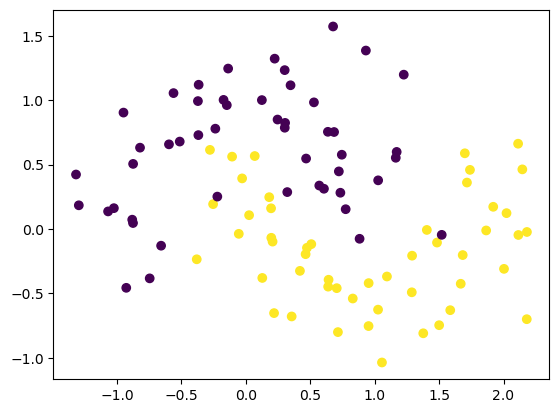

In [8]:
plt.scatter(x = df['X'], y = df['Y'], c=df['class'])

In [9]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(2, activation='sigmoid',input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Set parameters to zero

model.get_weights()

[array([[0.37120402, 1.1082546 ],
        [1.063347  , 0.08509231]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1122708 ],
        [ 0.31739843]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
initial_weights = model.get_weights()

In [26]:
initial_weights[0] = np.zeros(initial_weights[0].shape)
initial_weights[1] = np.zeros(initial_weights[1].shape)
initial_weights[2] = np.zeros(initial_weights[2].shape)
initial_weights[3] = np.zeros(initial_weights[3].shape)

In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.4051 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [31]:
model.get_weights()

[array([[ 0.4529065 ,  0.4529065 ],
        [-0.48405033, -0.48405033]], dtype=float32),
 array([-0.06687152, -0.06687152], dtype=float32),
 array([[0.10904232],
        [0.10904232]], dtype=float32),
 array([-0.01939356], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

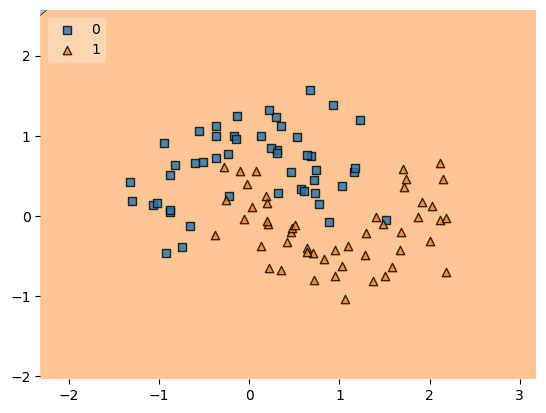

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)